import numpy as np      
import scipy.io.wavfile 
import subprocess
import librosa
import librosa.display
import IPython.display as ipd
from random import shuffle
import pandas as pd
from pathlib import Path, PurePath   
from tqdm import tqdm
import pickle as pickle

In [1]:
import numpy as np      
import scipy.io.wavfile 
import subprocess
import librosa
import librosa.display
import IPython.display as ipd
from random import shuffle
import pandas as pd
from pathlib import Path, PurePath   
from tqdm import tqdm
import pickle as pickle
import sklearn

In [2]:
pip install librosa


  Created wheel for audioread: filename=audioread-3.0.0-py3-none-any.whl size=23706 sha256=6824a78316514317f2c3115f5f2f7934114d8b6157b217de3fd627294759d719
  Stored in directory: c:\users\d. rhuthvik\appdata\local\pip\cache\wheels\e4\76\a4\cfb55573167a1f5bde7d7a348e95e509c64b2c3e8f921932c3
Successfully built audioread
Note: you may need to restart the kernel to use updated packages.


In [2]:
PATH_TEST_QUERY = "./query/track" 
PATH_ALL_LIST = "D:/MOMDS-cse353/MP3-dataset/mp3s-32k/all.list"
PATH_SONGS_FOLDER = "D:/MOMDS-cse353/MP3-dataset/wav/"
PATH_SHINGLES_FILE_ROUNDED = "D:/MOMDS-cse353/MP3-dataset/pickle/shingles_numpy_rounded.pickle"
PATH_DICT_FILE_ROUNDED = "D:/MOMDS-cse353/MP3-dataset/pickle/song_peaks_rounded.pickle"
PATH_MATRIX_ROUNDED = "D:/MOMDS-cse353/MP3-dataset/pickle/matrix_rounded.pickle"
path = "D:/MOMDS-cse353/MP3-dataset/mp3s-32k"
song_path = "D:/MOMDS-cse353/MP3-dataset/mp3s-32k/aerosmith/Aerosmith/"

In [3]:
N_TRACKS = 1413
DURATION = 15
HOP_SIZE = 512
OFFSET = 1.0
THRESHOLD = 0.2
nperm = 20

In [4]:
def save_pickle(element, path):
    with open(f"{path}", 'wb') as f:
        pickle.dump(element, f, pickle.HIGHEST_PROTOCOL)

In [5]:
def load_pickle(path):
    with open(f"{path}", 'rb',) as f:
        return pickle.load(f)
    

In [6]:
def convert_mp3_to_wav(audio:str) -> str:  
    if audio[-3:] == "mp3":
        wav_audio = audio[:-3] + "wav"
        if not Path(wav_audio).exists():
                subprocess.check_output(f"ffmpeg -i {audio} {wav_audio}", shell=True)
        return wav_audio
    
    return audio

In [7]:
def plot_spectrogram_and_peaks(track:np.ndarray, sr:int, peaks:np.ndarray, onset_env:np.ndarray) -> None:
    times = librosa.frames_to_time(np.arange(len(onset_env)),
                            sr=sr, hop_length=HOP_SIZE)

    plt.figure()
    ax = plt.subplot(2, 1, 2)
    D = librosa.stft(track)
    librosa.display.specshow(librosa.amplitude_to_db(np.abs(D), ref=np.max),
                            y_axis='log', x_axis='time')
    plt.subplot(2, 1, 1, sharex=ax)
    plt.plot(times, onset_env, alpha=0.8, label='Onset strength')
    plt.vlines(times[peaks], 0,
            onset_env.max(), color='r', alpha=0.8,
            label='Selected peaks')
    plt.legend(frameon=True, framealpha=0.8)
    plt.axis('tight')
    plt.tight_layout()
    plt.show()

In [15]:
def load_audio_peaks(audio, offset, duration, hop_size):
        
    track, sr = librosa.load(audio, offset=offset, duration=duration)
    onset_env = librosa.onset.onset_strength(track, sr=sr, hop_length=hop_size)
    peaks = librosa.util.peak_pick(onset_env, 10, 10, 10, 10, 0.5, 0.5)

    return track, sr, onset_env, peaks


In [16]:
def extract_peaks(song_path, rounded = False):
    
    song_peaks = {}
    if rounded == True:
        for song in tqdm(song_path):
            tmp1, tmp2, onset, peaks = load_audio_peaks(str(song), OFFSET, DURATION, HOP_SIZE)
            song_peaks[' '.join(str(song).split('/')[-1][3:-4].split('_')).lower() + ' - ' + ' '.join(str(song).split('/')[0].split('_'))] = np.array(onset[peaks]).round(1)
    else:
        for song in tqdm(song_path):
            tmp1, tmp2, onset, peaks = load_audio_peaks(str(song), OFFSET, DURATION, HOP_SIZE)
            song_peaks[' '.join(str(song).split('/')[-1][3:-4].split('_')).lower() + ' - ' + ' '.join(str(song).split('/')[0].split('_'))] = np.array(onset[peaks])
            
    return song_peaks

In [17]:
def unique_shingles(song_peaks):    
    
    tot_shingles = list(song_peaks.values())

    shingles = []
    for i in tqdm(tot_shingles):
        shingles.append(i)

    shingles = np.hstack(shingles)
    shingles = np.array(list(dict.fromkeys(shingles))) # all unique peaks

    return shingles

In [18]:
data_folder = Path(path)
mp3_tracks = data_folder.glob("*/*/*.mp3")
tracks = data_folder.glob("*/*/*.wav")

In [19]:
for track in tqdm(mp3_tracks):
#     print(str(track))
    convert_mp3_to_wav(str(track))

1413it [00:00, 7172.46it/s]


In [20]:
data_folder

WindowsPath('D:/MOMDS-cse353/MP3-dataset/mp3s-32k')

In [21]:
song_peaks = extract_peaks(tracks, rounded = True)

0it [00:00, ?it/s]C:\Users\DD1E2~1.RHU\AppData\Local\Temp/ipykernel_27084/1987614253.py:4: FutureWarning: Pass y=[-0.07688674 -0.09679742 -0.09849963 ... -0.13534957 -0.12906073
 -0.08165741] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  onset_env = librosa.onset.onset_strength(track, sr=sr, hop_length=hop_size)
C:\Users\DD1E2~1.RHU\AppData\Local\Temp/ipykernel_27084/1987614253.py:5: FutureWarning: Pass pre_max=10, post_max=10, pre_avg=10, post_avg=10, delta=0.5, wait=0.5 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  peaks = librosa.util.peak_pick(onset_env, 10, 10, 10, 10, 0.5, 0.5)
1it [00:01,  1.84s/it]C:\Users\DD1E2~1.RHU\AppData\Local\Temp/ipykernel_27084/1987614253.py:4: FutureWarning: Pass y=[-0.0154364  -0.0214245  -0.02026949 ... -0.087686   -0.00832485
  0.02926169] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  onset_en

22it [00:11,  1.78it/s]C:\Users\DD1E2~1.RHU\AppData\Local\Temp/ipykernel_27084/1987614253.py:4: FutureWarning: Pass y=[-0.05207166 -0.0143789   0.04932195 ...  0.04493635  0.07349329
  0.06251951] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  onset_env = librosa.onset.onset_strength(track, sr=sr, hop_length=hop_size)
23it [00:12,  1.46it/s]C:\Users\DD1E2~1.RHU\AppData\Local\Temp/ipykernel_27084/1987614253.py:4: FutureWarning: Pass y=[ 2.5876414e-04  6.8331647e-05 -3.0849065e-04 ... -2.8277507e-02
 -2.6416862e-02 -1.5013060e-02] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  onset_env = librosa.onset.onset_strength(track, sr=sr, hop_length=hop_size)
24it [00:13,  1.28it/s]C:\Users\DD1E2~1.RHU\AppData\Local\Temp/ipykernel_27084/1987614253.py:4: FutureWarning: Pass y=[0.0004807  0.0008486  0.00110213 ... 0.03126191 0.02580487 0.01126924] as keyword args. From version 0.10 passing these

44it [00:28,  1.33it/s]C:\Users\DD1E2~1.RHU\AppData\Local\Temp/ipykernel_27084/1987614253.py:4: FutureWarning: Pass y=[-0.0010217  -0.00270109 -0.00350287 ... -0.00204123  0.10369784
  0.07991778] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  onset_env = librosa.onset.onset_strength(track, sr=sr, hop_length=hop_size)
45it [00:29,  1.36it/s]C:\Users\DD1E2~1.RHU\AppData\Local\Temp/ipykernel_27084/1987614253.py:4: FutureWarning: Pass y=[-0.21057482 -0.23133294 -0.1733446  ...  0.04988246  0.03160101
  0.01266341] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  onset_env = librosa.onset.onset_strength(track, sr=sr, hop_length=hop_size)
46it [00:30,  1.41it/s]C:\Users\DD1E2~1.RHU\AppData\Local\Temp/ipykernel_27084/1987614253.py:4: FutureWarning: Pass y=[ 0.03127293 -0.02004979 -0.08876479 ...  0.03919267 -0.01816053
 -0.02016983] as keyword args. From version 0.10 passing these as positio

67it [00:46,  1.36it/s]C:\Users\DD1E2~1.RHU\AppData\Local\Temp/ipykernel_27084/1987614253.py:4: FutureWarning: Pass y=[ 0.06322655  0.07157519  0.05730018 ... -0.05156124 -0.09919594
 -0.07758504] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  onset_env = librosa.onset.onset_strength(track, sr=sr, hop_length=hop_size)
68it [00:46,  1.41it/s]C:\Users\DD1E2~1.RHU\AppData\Local\Temp/ipykernel_27084/1987614253.py:4: FutureWarning: Pass y=[-0.05694281 -0.06046132 -0.08076256 ...  0.06864376  0.05450757
  0.02908571] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  onset_env = librosa.onset.onset_strength(track, sr=sr, hop_length=hop_size)
69it [00:47,  1.39it/s]C:\Users\DD1E2~1.RHU\AppData\Local\Temp/ipykernel_27084/1987614253.py:4: FutureWarning: Pass y=[ 0.0007829   0.00496728 -0.0159742  ... -0.07353491 -0.08976523
 -0.06024532] as keyword args. From version 0.10 passing these as positio

90it [01:01,  1.51it/s]C:\Users\DD1E2~1.RHU\AppData\Local\Temp/ipykernel_27084/1987614253.py:4: FutureWarning: Pass y=[-0.00130303 -0.00104913 -0.00031535 ...  0.1574882   0.154659
  0.07362522] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  onset_env = librosa.onset.onset_strength(track, sr=sr, hop_length=hop_size)
91it [01:02,  1.39it/s]C:\Users\DD1E2~1.RHU\AppData\Local\Temp/ipykernel_27084/1987614253.py:4: FutureWarning: Pass y=[ 0.14996046  0.11562604  0.01917033 ... -0.21846528 -0.27680576
 -0.16943489] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  onset_env = librosa.onset.onset_strength(track, sr=sr, hop_length=hop_size)
92it [01:03,  1.32it/s]C:\Users\DD1E2~1.RHU\AppData\Local\Temp/ipykernel_27084/1987614253.py:4: FutureWarning: Pass y=[ 0.0752477   0.05975656  0.0097733  ... -0.08890611 -0.06572679
 -0.0238727 ] as keyword args. From version 0.10 passing these as positiona

112it [01:17,  1.26it/s]C:\Users\DD1E2~1.RHU\AppData\Local\Temp/ipykernel_27084/1987614253.py:4: FutureWarning: Pass y=[ 0.02999277  0.0220917   0.00447214 ... -0.06274236 -0.09427302
 -0.07035521] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  onset_env = librosa.onset.onset_strength(track, sr=sr, hop_length=hop_size)
113it [01:18,  1.33it/s]C:\Users\DD1E2~1.RHU\AppData\Local\Temp/ipykernel_27084/1987614253.py:4: FutureWarning: Pass y=[ 0.04472126  0.05425389  0.05192959 ... -0.0242416  -0.01604596
 -0.00235434] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  onset_env = librosa.onset.onset_strength(track, sr=sr, hop_length=hop_size)
114it [01:18,  1.38it/s]C:\Users\DD1E2~1.RHU\AppData\Local\Temp/ipykernel_27084/1987614253.py:4: FutureWarning: Pass y=[ 0.11934543  0.07194679 -0.02489779 ...  0.12052707  0.18810995
  0.13049698] as keyword args. From version 0.10 passing these as posi

135it [01:34,  1.43it/s]C:\Users\DD1E2~1.RHU\AppData\Local\Temp/ipykernel_27084/1987614253.py:4: FutureWarning: Pass y=[-0.00219867 -0.00168086 -0.00024026 ... -0.0107592   0.00974707
  0.01331191] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  onset_env = librosa.onset.onset_strength(track, sr=sr, hop_length=hop_size)
136it [01:35,  1.37it/s]C:\Users\DD1E2~1.RHU\AppData\Local\Temp/ipykernel_27084/1987614253.py:4: FutureWarning: Pass y=[ 0.00846379  0.00998582  0.00845897 ... -0.0190396  -0.0354043
 -0.02809542] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  onset_env = librosa.onset.onset_strength(track, sr=sr, hop_length=hop_size)
137it [01:36,  1.24it/s]C:\Users\DD1E2~1.RHU\AppData\Local\Temp/ipykernel_27084/1987614253.py:4: FutureWarning: Pass y=[-0.07620373 -0.09482356 -0.08627017 ... -0.04662904 -0.03077311
 -0.01117672] as keyword args. From version 0.10 passing these as posit

157it [01:51,  1.27it/s]C:\Users\DD1E2~1.RHU\AppData\Local\Temp/ipykernel_27084/1987614253.py:4: FutureWarning: Pass y=[ 0.04074708  0.04681612  0.0387524  ... -0.00763904  0.15155771
  0.14654516] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  onset_env = librosa.onset.onset_strength(track, sr=sr, hop_length=hop_size)
158it [01:52,  1.27it/s]C:\Users\DD1E2~1.RHU\AppData\Local\Temp/ipykernel_27084/1987614253.py:4: FutureWarning: Pass y=[ 0.03205559  0.04012331  0.02680503 ...  0.04558144 -0.03705836
 -0.05473707] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  onset_env = librosa.onset.onset_strength(track, sr=sr, hop_length=hop_size)
159it [01:53,  1.35it/s]C:\Users\DD1E2~1.RHU\AppData\Local\Temp/ipykernel_27084/1987614253.py:4: FutureWarning: Pass y=[ 0.00391006 -0.00396533 -0.00932735 ... -0.14060035 -0.1789388
 -0.12505513] as keyword args. From version 0.10 passing these as posit

179it [02:10,  1.49it/s]C:\Users\DD1E2~1.RHU\AppData\Local\Temp/ipykernel_27084/1987614253.py:4: FutureWarning: Pass y=[-0.00553358  0.02126581  0.03329473 ...  0.30820417  0.27600613
  0.1628764 ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  onset_env = librosa.onset.onset_strength(track, sr=sr, hop_length=hop_size)
180it [02:11,  1.43it/s]C:\Users\DD1E2~1.RHU\AppData\Local\Temp/ipykernel_27084/1987614253.py:4: FutureWarning: Pass y=[-0.02352127 -0.02179326 -0.00658419 ... -0.33046672 -0.36146203
 -0.2072126 ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  onset_env = librosa.onset.onset_strength(track, sr=sr, hop_length=hop_size)
181it [02:11,  1.44it/s]C:\Users\DD1E2~1.RHU\AppData\Local\Temp/ipykernel_27084/1987614253.py:4: FutureWarning: Pass y=[ 0.04825182  0.05684942  0.05014728 ...  0.08720843  0.03229548
 -0.00065021] as keyword args. From version 0.10 passing these as posi

201it [02:25,  1.41it/s]C:\Users\DD1E2~1.RHU\AppData\Local\Temp/ipykernel_27084/1987614253.py:4: FutureWarning: Pass y=[ 0.00240877  0.00280489  0.00205781 ... -0.03679403 -0.03281825
 -0.01832629] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  onset_env = librosa.onset.onset_strength(track, sr=sr, hop_length=hop_size)
202it [02:26,  1.46it/s]C:\Users\DD1E2~1.RHU\AppData\Local\Temp/ipykernel_27084/1987614253.py:4: FutureWarning: Pass y=[2.9026907e-05 3.3169035e-05 2.9817569e-05 ... 6.5151937e-02 7.3412567e-02
 4.6956472e-02] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  onset_env = librosa.onset.onset_strength(track, sr=sr, hop_length=hop_size)
203it [02:26,  1.48it/s]C:\Users\DD1E2~1.RHU\AppData\Local\Temp/ipykernel_27084/1987614253.py:4: FutureWarning: Pass y=[-0.01131666  0.02029414  0.0456762  ...  0.06294797  0.05431012
  0.03025662] as keyword args. From version 0.10 passing t

223it [02:40,  1.35it/s]C:\Users\DD1E2~1.RHU\AppData\Local\Temp/ipykernel_27084/1987614253.py:4: FutureWarning: Pass y=[-0.14903046 -0.14395513 -0.05720236 ...  0.03747059  0.00786076
 -0.00104731] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  onset_env = librosa.onset.onset_strength(track, sr=sr, hop_length=hop_size)
224it [02:41,  1.43it/s]C:\Users\DD1E2~1.RHU\AppData\Local\Temp/ipykernel_27084/1987614253.py:4: FutureWarning: Pass y=[0.04322968 0.05171429 0.04845656 ... 0.12309791 0.0895064  0.02454054] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  onset_env = librosa.onset.onset_strength(track, sr=sr, hop_length=hop_size)
225it [02:41,  1.47it/s]C:\Users\DD1E2~1.RHU\AppData\Local\Temp/ipykernel_27084/1987614253.py:4: FutureWarning: Pass y=[ 0.02039635  0.03562487  0.04584556 ... -0.06823877 -0.08947785
 -0.04878144] as keyword args. From version 0.10 passing these as positional 

245it [02:55,  1.54it/s]C:\Users\DD1E2~1.RHU\AppData\Local\Temp/ipykernel_27084/1987614253.py:4: FutureWarning: Pass y=[-0.08221646 -0.09883768 -0.07698792 ...  0.05217973  0.05995776
  0.02922009] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  onset_env = librosa.onset.onset_strength(track, sr=sr, hop_length=hop_size)
246it [02:56,  1.57it/s]C:\Users\DD1E2~1.RHU\AppData\Local\Temp/ipykernel_27084/1987614253.py:4: FutureWarning: Pass y=[0.00305367 0.00360759 0.00304857 ... 0.08241536 0.08218728 0.0494427 ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  onset_env = librosa.onset.onset_strength(track, sr=sr, hop_length=hop_size)
247it [02:56,  1.48it/s]C:\Users\DD1E2~1.RHU\AppData\Local\Temp/ipykernel_27084/1987614253.py:4: FutureWarning: Pass y=[-0.01171199 -0.0132164  -0.01048183 ... -0.05839817 -0.04217582
 -0.02445102] as keyword args. From version 0.10 passing these as positional 

267it [03:10,  1.37it/s]C:\Users\DD1E2~1.RHU\AppData\Local\Temp/ipykernel_27084/1987614253.py:4: FutureWarning: Pass y=[0.01760801 0.01997898 0.01693233 ... 0.05918242 0.06904341 0.04778352] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  onset_env = librosa.onset.onset_strength(track, sr=sr, hop_length=hop_size)
268it [03:11,  1.39it/s]C:\Users\DD1E2~1.RHU\AppData\Local\Temp/ipykernel_27084/1987614253.py:4: FutureWarning: Pass y=[-1.7662713e-04 -2.4553321e-04 -2.5404268e-04 ...  2.0236151e-01
  1.9865246e-01  1.1351065e-01] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  onset_env = librosa.onset.onset_strength(track, sr=sr, hop_length=hop_size)
269it [03:11,  1.46it/s]C:\Users\DD1E2~1.RHU\AppData\Local\Temp/ipykernel_27084/1987614253.py:4: FutureWarning: Pass y=[-0.02852757 -0.03749877 -0.03602581 ...  0.05444144  0.03013702
  0.01437518] as keyword args. From version 0.10 passing th

289it [03:25,  1.46it/s]C:\Users\DD1E2~1.RHU\AppData\Local\Temp/ipykernel_27084/1987614253.py:4: FutureWarning: Pass y=[ 0.2476963   0.25251326  0.2012724  ... -0.03216754 -0.04901243
 -0.03309441] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  onset_env = librosa.onset.onset_strength(track, sr=sr, hop_length=hop_size)
290it [03:25,  1.50it/s]C:\Users\DD1E2~1.RHU\AppData\Local\Temp/ipykernel_27084/1987614253.py:4: FutureWarning: Pass y=[0.04374252 0.04705938 0.03444112 ... 0.11658098 0.13437873 0.0874306 ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  onset_env = librosa.onset.onset_strength(track, sr=sr, hop_length=hop_size)
291it [03:26,  1.53it/s]C:\Users\DD1E2~1.RHU\AppData\Local\Temp/ipykernel_27084/1987614253.py:4: FutureWarning: Pass y=[-0.07590391 -0.09187935 -0.06471689 ... -0.0421023  -0.07762694
 -0.06044649] as keyword args. From version 0.10 passing these as positional 

311it [03:39,  1.54it/s]C:\Users\DD1E2~1.RHU\AppData\Local\Temp/ipykernel_27084/1987614253.py:4: FutureWarning: Pass y=[ 0.04799288  0.05667235  0.04828047 ... -0.06237122 -0.07021019
 -0.04435563] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  onset_env = librosa.onset.onset_strength(track, sr=sr, hop_length=hop_size)
312it [03:40,  1.55it/s]C:\Users\DD1E2~1.RHU\AppData\Local\Temp/ipykernel_27084/1987614253.py:4: FutureWarning: Pass y=[ 0.02014656  0.02304832  0.01924006 ... -0.30871668 -0.32731086
 -0.2051509 ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  onset_env = librosa.onset.onset_strength(track, sr=sr, hop_length=hop_size)
313it [03:41,  1.47it/s]C:\Users\DD1E2~1.RHU\AppData\Local\Temp/ipykernel_27084/1987614253.py:4: FutureWarning: Pass y=[-0.02607192 -0.02734329  0.00520069 ...  0.1203779   0.11493947
  0.05400149] as keyword args. From version 0.10 passing these as posi

333it [03:54,  1.56it/s]C:\Users\DD1E2~1.RHU\AppData\Local\Temp/ipykernel_27084/1987614253.py:4: FutureWarning: Pass y=[0.02309493 0.02528441 0.0196496  ... 0.02407076 0.02928335 0.02064687] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  onset_env = librosa.onset.onset_strength(track, sr=sr, hop_length=hop_size)
334it [03:54,  1.57it/s]C:\Users\DD1E2~1.RHU\AppData\Local\Temp/ipykernel_27084/1987614253.py:4: FutureWarning: Pass y=[-0.02950861 -0.0244297   0.00027262 ... -0.07808539 -0.08816726
 -0.06478833] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  onset_env = librosa.onset.onset_strength(track, sr=sr, hop_length=hop_size)
335it [03:55,  1.55it/s]C:\Users\DD1E2~1.RHU\AppData\Local\Temp/ipykernel_27084/1987614253.py:4: FutureWarning: Pass y=[ 0.02740047  0.03194686  0.0275409  ... -0.01296863 -0.01849181
 -0.01130796] as keyword args. From version 0.10 passing these as positional 

355it [04:10,  1.16it/s]C:\Users\DD1E2~1.RHU\AppData\Local\Temp/ipykernel_27084/1987614253.py:4: FutureWarning: Pass y=[3.6344710e-03 2.6552058e-03 8.9619629e-05 ... 1.1019825e-02 1.0757990e-02
 4.9683871e-03] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  onset_env = librosa.onset.onset_strength(track, sr=sr, hop_length=hop_size)
356it [04:11,  1.23it/s]C:\Users\DD1E2~1.RHU\AppData\Local\Temp/ipykernel_27084/1987614253.py:4: FutureWarning: Pass y=[-0.08634471 -0.0900608  -0.04872276 ... -0.06486087 -0.08343756
 -0.05721893] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  onset_env = librosa.onset.onset_strength(track, sr=sr, hop_length=hop_size)
357it [04:11,  1.33it/s]C:\Users\DD1E2~1.RHU\AppData\Local\Temp/ipykernel_27084/1987614253.py:4: FutureWarning: Pass y=[0.11775088 0.12827966 0.09346743 ... 0.11177703 0.11906601 0.08135945] as keyword args. From version 0.10 passing these as

377it [04:24,  1.54it/s]C:\Users\DD1E2~1.RHU\AppData\Local\Temp/ipykernel_27084/1987614253.py:4: FutureWarning: Pass y=[0.         0.         0.         ... 0.04509916 0.06252868 0.05225648] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  onset_env = librosa.onset.onset_strength(track, sr=sr, hop_length=hop_size)
378it [04:25,  1.56it/s]C:\Users\DD1E2~1.RHU\AppData\Local\Temp/ipykernel_27084/1987614253.py:4: FutureWarning: Pass y=[-0.0111385  -0.01256043 -0.01026615 ...  0.06094025  0.06679433
  0.04235303] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  onset_env = librosa.onset.onset_strength(track, sr=sr, hop_length=hop_size)
379it [04:26,  1.57it/s]C:\Users\DD1E2~1.RHU\AppData\Local\Temp/ipykernel_27084/1987614253.py:4: FutureWarning: Pass y=[ 0.00834285  0.01269878  0.01231683 ...  0.00256587 -0.01075617
 -0.01196651] as keyword args. From version 0.10 passing these as positional 

399it [04:39,  1.49it/s]C:\Users\DD1E2~1.RHU\AppData\Local\Temp/ipykernel_27084/1987614253.py:4: FutureWarning: Pass y=[-0.02966345 -0.03009017 -0.01903303 ...  0.02869199  0.10907687
  0.07461162] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  onset_env = librosa.onset.onset_strength(track, sr=sr, hop_length=hop_size)
400it [04:39,  1.52it/s]C:\Users\DD1E2~1.RHU\AppData\Local\Temp/ipykernel_27084/1987614253.py:4: FutureWarning: Pass y=[-0.00808798 -0.02440108 -0.01553904 ...  0.00762364 -0.00021136
 -0.00659441] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  onset_env = librosa.onset.onset_strength(track, sr=sr, hop_length=hop_size)
401it [04:40,  1.59it/s]C:\Users\DD1E2~1.RHU\AppData\Local\Temp/ipykernel_27084/1987614253.py:4: FutureWarning: Pass y=[-0.02340004 -0.04406498 -0.04655894 ... -0.0471124  -0.19860758
 -0.142106  ] as keyword args. From version 0.10 passing these as posi

421it [04:53,  1.51it/s]C:\Users\DD1E2~1.RHU\AppData\Local\Temp/ipykernel_27084/1987614253.py:4: FutureWarning: Pass y=[0.0187054  0.00283277 0.00561986 ... 0.03632673 0.06326015 0.05050878] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  onset_env = librosa.onset.onset_strength(track, sr=sr, hop_length=hop_size)
422it [04:54,  1.47it/s]C:\Users\DD1E2~1.RHU\AppData\Local\Temp/ipykernel_27084/1987614253.py:4: FutureWarning: Pass y=[-0.01112398 -0.01622771 -0.01535462 ... -0.08493719 -0.06969436
 -0.0175867 ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  onset_env = librosa.onset.onset_strength(track, sr=sr, hop_length=hop_size)
423it [04:54,  1.50it/s]C:\Users\DD1E2~1.RHU\AppData\Local\Temp/ipykernel_27084/1987614253.py:4: FutureWarning: Pass y=[0.02896071 0.03354226 0.02555611 ... 0.15011592 0.1415333  0.07279871] as keyword args. From version 0.10 passing these as positional argumen

443it [05:10,  1.37it/s]C:\Users\DD1E2~1.RHU\AppData\Local\Temp/ipykernel_27084/1987614253.py:4: FutureWarning: Pass y=[-0.02463398 -0.02455655 -0.0152536  ...  0.05267569  0.06909405
  0.04740054] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  onset_env = librosa.onset.onset_strength(track, sr=sr, hop_length=hop_size)
444it [05:11,  1.42it/s]C:\Users\DD1E2~1.RHU\AppData\Local\Temp/ipykernel_27084/1987614253.py:4: FutureWarning: Pass y=[0.00204573 0.00247854 0.00232331 ... 0.09181347 0.0915843  0.05545699] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  onset_env = librosa.onset.onset_strength(track, sr=sr, hop_length=hop_size)
445it [05:11,  1.48it/s]C:\Users\DD1E2~1.RHU\AppData\Local\Temp/ipykernel_27084/1987614253.py:4: FutureWarning: Pass y=[0.00320199 0.00398689 0.00403777 ... 0.05860446 0.07060963 0.04370245] as keyword args. From version 0.10 passing these as positional argumen

465it [05:24,  1.49it/s]C:\Users\DD1E2~1.RHU\AppData\Local\Temp/ipykernel_27084/1987614253.py:4: FutureWarning: Pass y=[ 0.03939226  0.03736112  0.03065547 ... -0.03177651 -0.03717717
 -0.02479622] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  onset_env = librosa.onset.onset_strength(track, sr=sr, hop_length=hop_size)
466it [05:25,  1.54it/s]C:\Users\DD1E2~1.RHU\AppData\Local\Temp/ipykernel_27084/1987614253.py:4: FutureWarning: Pass y=[-0.02029352 -0.01939713 -0.01515726 ... -0.04180417 -0.06582342
 -0.02832313] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  onset_env = librosa.onset.onset_strength(track, sr=sr, hop_length=hop_size)
467it [05:26,  1.56it/s]C:\Users\DD1E2~1.RHU\AppData\Local\Temp/ipykernel_27084/1987614253.py:4: FutureWarning: Pass y=[ 1.5768692e-03  1.0833393e-03 -6.9459260e-05 ... -2.7748670e-02
 -3.5266954e-02 -2.3539698e-02] as keyword args. From version 0.10 pas

487it [05:39,  1.60it/s]C:\Users\DD1E2~1.RHU\AppData\Local\Temp/ipykernel_27084/1987614253.py:4: FutureWarning: Pass y=[0.00462079 0.00596936 0.00455356 ... 0.00743427 0.00760222 0.00426313] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  onset_env = librosa.onset.onset_strength(track, sr=sr, hop_length=hop_size)
488it [05:39,  1.45it/s]C:\Users\DD1E2~1.RHU\AppData\Local\Temp/ipykernel_27084/1987614253.py:4: FutureWarning: Pass y=[-0.04288984 -0.04881964 -0.04028789 ...  0.02826707  0.03477684
  0.02312397] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  onset_env = librosa.onset.onset_strength(track, sr=sr, hop_length=hop_size)
489it [05:40,  1.40it/s]C:\Users\DD1E2~1.RHU\AppData\Local\Temp/ipykernel_27084/1987614253.py:4: FutureWarning: Pass y=[-0.05486878 -0.04937021 -0.0430868  ... -0.1514643  -0.14783587
 -0.09091088] as keyword args. From version 0.10 passing these as positional 

509it [05:53,  1.47it/s]C:\Users\DD1E2~1.RHU\AppData\Local\Temp/ipykernel_27084/1987614253.py:4: FutureWarning: Pass y=[-0.00621135 -0.02849524 -0.02705394 ... -0.00990425 -0.00072388
 -0.0151224 ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  onset_env = librosa.onset.onset_strength(track, sr=sr, hop_length=hop_size)
510it [05:54,  1.52it/s]C:\Users\DD1E2~1.RHU\AppData\Local\Temp/ipykernel_27084/1987614253.py:4: FutureWarning: Pass y=[ 0.02198867  0.02356114  0.01796695 ... -0.01239591 -0.00383041
 -0.00300065] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  onset_env = librosa.onset.onset_strength(track, sr=sr, hop_length=hop_size)
511it [05:55,  1.56it/s]C:\Users\DD1E2~1.RHU\AppData\Local\Temp/ipykernel_27084/1987614253.py:4: FutureWarning: Pass y=[-0.00492777 -0.00882076 -0.01086363 ...  0.00298278  0.00070178
 -0.00052305] as keyword args. From version 0.10 passing these as posi

531it [06:08,  1.56it/s]C:\Users\DD1E2~1.RHU\AppData\Local\Temp/ipykernel_27084/1987614253.py:4: FutureWarning: Pass y=[ 0.01986497  0.02186923  0.0129074  ... -0.01764944 -0.01440438
 -0.00801642] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  onset_env = librosa.onset.onset_strength(track, sr=sr, hop_length=hop_size)
532it [06:08,  1.58it/s]C:\Users\DD1E2~1.RHU\AppData\Local\Temp/ipykernel_27084/1987614253.py:4: FutureWarning: Pass y=[ 0.03880457  0.04426588  0.03638492 ... -0.00247891 -0.00617703
 -0.00497016] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  onset_env = librosa.onset.onset_strength(track, sr=sr, hop_length=hop_size)
533it [06:09,  1.56it/s]C:\Users\DD1E2~1.RHU\AppData\Local\Temp/ipykernel_27084/1987614253.py:4: FutureWarning: Pass y=[0.03811751 0.04634102 0.04089095 ... 0.02120134 0.02459648 0.01606299] as keyword args. From version 0.10 passing these as positional 

553it [06:22,  1.57it/s]C:\Users\DD1E2~1.RHU\AppData\Local\Temp/ipykernel_27084/1987614253.py:4: FutureWarning: Pass y=[-0.08644535 -0.11201909 -0.10340538 ... -0.03822127 -0.03905794
 -0.02458201] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  onset_env = librosa.onset.onset_strength(track, sr=sr, hop_length=hop_size)
554it [06:23,  1.58it/s]C:\Users\DD1E2~1.RHU\AppData\Local\Temp/ipykernel_27084/1987614253.py:4: FutureWarning: Pass y=[-0.04018236 -0.03526535 -0.017416   ... -0.04708214 -0.03871537
 -0.02011851] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  onset_env = librosa.onset.onset_strength(track, sr=sr, hop_length=hop_size)
555it [06:24,  1.60it/s]C:\Users\DD1E2~1.RHU\AppData\Local\Temp/ipykernel_27084/1987614253.py:4: FutureWarning: Pass y=[ 5.3604949e-01  5.8571827e-01  3.9982483e-01 ...  1.7270715e-04
 -9.8262751e-04 -1.0762349e-03] as keyword args. From version 0.10 pas

575it [06:37,  1.46it/s]C:\Users\DD1E2~1.RHU\AppData\Local\Temp/ipykernel_27084/1987614253.py:4: FutureWarning: Pass y=[-0.01584235 -0.01747858 -0.00670658 ...  0.2280259   0.23113394
  0.10824922] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  onset_env = librosa.onset.onset_strength(track, sr=sr, hop_length=hop_size)
576it [06:38,  1.42it/s]C:\Users\DD1E2~1.RHU\AppData\Local\Temp/ipykernel_27084/1987614253.py:4: FutureWarning: Pass y=[0.1322073  0.2482466  0.28947347 ... 0.23812109 0.16760251 0.05330968] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  onset_env = librosa.onset.onset_strength(track, sr=sr, hop_length=hop_size)
577it [06:38,  1.44it/s]C:\Users\DD1E2~1.RHU\AppData\Local\Temp/ipykernel_27084/1987614253.py:4: FutureWarning: Pass y=[-0.03165257 -0.03149722 -0.02277261 ... -0.10055408 -0.11290979
 -0.07267654] as keyword args. From version 0.10 passing these as positional 

597it [06:53,  1.36it/s]C:\Users\DD1E2~1.RHU\AppData\Local\Temp/ipykernel_27084/1987614253.py:4: FutureWarning: Pass y=[ 0.33682492  0.41164115  0.36662188 ... -0.3452082  -0.30323654
 -0.16503036] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  onset_env = librosa.onset.onset_strength(track, sr=sr, hop_length=hop_size)
598it [06:53,  1.41it/s]C:\Users\DD1E2~1.RHU\AppData\Local\Temp/ipykernel_27084/1987614253.py:4: FutureWarning: Pass y=[ 0.          0.          0.         ...  0.00148658 -0.00303781
 -0.00368288] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  onset_env = librosa.onset.onset_strength(track, sr=sr, hop_length=hop_size)
599it [06:54,  1.44it/s]C:\Users\DD1E2~1.RHU\AppData\Local\Temp/ipykernel_27084/1987614253.py:4: FutureWarning: Pass y=[-0.0427153  -0.11694677 -0.23234563 ... -0.2859249  -0.4027059
 -0.27120814] as keyword args. From version 0.10 passing these as posit

619it [07:08,  1.47it/s]C:\Users\DD1E2~1.RHU\AppData\Local\Temp/ipykernel_27084/1987614253.py:4: FutureWarning: Pass y=[-0.02460125  0.00687895  0.07122499 ... -0.08709341  0.07005147
  0.12617753] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  onset_env = librosa.onset.onset_strength(track, sr=sr, hop_length=hop_size)
620it [07:08,  1.48it/s]C:\Users\DD1E2~1.RHU\AppData\Local\Temp/ipykernel_27084/1987614253.py:4: FutureWarning: Pass y=[-0.00113174 -0.003814   -0.01051669 ... -0.06625275 -0.05927708
 -0.04112038] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  onset_env = librosa.onset.onset_strength(track, sr=sr, hop_length=hop_size)
621it [07:09,  1.53it/s]C:\Users\DD1E2~1.RHU\AppData\Local\Temp/ipykernel_27084/1987614253.py:4: FutureWarning: Pass y=[-0.12329901 -0.16782251 -0.1549052  ...  0.11403574  0.2898619
  0.30155736] as keyword args. From version 0.10 passing these as posit

641it [07:22,  1.59it/s]C:\Users\DD1E2~1.RHU\AppData\Local\Temp/ipykernel_27084/1987614253.py:4: FutureWarning: Pass y=[ 0.28463987  0.2719545   0.15122439 ... -0.23391823 -0.39309114
 -0.27045822] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  onset_env = librosa.onset.onset_strength(track, sr=sr, hop_length=hop_size)
642it [07:23,  1.59it/s]C:\Users\DD1E2~1.RHU\AppData\Local\Temp/ipykernel_27084/1987614253.py:4: FutureWarning: Pass y=[ 3.1932103e-03 -7.1781316e-05 -4.5543364e-03 ... -1.9411340e-02
 -2.1117846e-02 -1.4324141e-02] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  onset_env = librosa.onset.onset_strength(track, sr=sr, hop_length=hop_size)
643it [07:24,  1.41it/s]C:\Users\DD1E2~1.RHU\AppData\Local\Temp/ipykernel_27084/1987614253.py:4: FutureWarning: Pass y=[0.0186413  0.014954   0.00519842 ... 0.23327307 0.25697345 0.14753336] as keyword args. From version 0.10 passing th

664it [07:38,  1.47it/s]C:\Users\DD1E2~1.RHU\AppData\Local\Temp/ipykernel_27084/1987614253.py:4: FutureWarning: Pass y=[0.04424553 0.04794828 0.03089427 ... 0.01515801 0.01941697 0.01393729] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  onset_env = librosa.onset.onset_strength(track, sr=sr, hop_length=hop_size)
665it [07:38,  1.51it/s]C:\Users\DD1E2~1.RHU\AppData\Local\Temp/ipykernel_27084/1987614253.py:4: FutureWarning: Pass y=[-0.00143892 -0.00191873 -0.00193565 ... -0.03775472 -0.04547419
 -0.0302788 ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  onset_env = librosa.onset.onset_strength(track, sr=sr, hop_length=hop_size)
666it [07:39,  1.51it/s]C:\Users\DD1E2~1.RHU\AppData\Local\Temp/ipykernel_27084/1987614253.py:4: FutureWarning: Pass y=[-0.03914106 -0.05710682 -0.06807411 ... -0.02661202 -0.03218921
 -0.02136979] as keyword args. From version 0.10 passing these as positional 

686it [07:53,  1.24it/s]C:\Users\DD1E2~1.RHU\AppData\Local\Temp/ipykernel_27084/1987614253.py:4: FutureWarning: Pass y=[-0.001357   -0.00138259 -0.00106987 ...  0.00148051  0.00262349
  0.00174393] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  onset_env = librosa.onset.onset_strength(track, sr=sr, hop_length=hop_size)
687it [07:54,  1.33it/s]C:\Users\DD1E2~1.RHU\AppData\Local\Temp/ipykernel_27084/1987614253.py:4: FutureWarning: Pass y=[ 0.01663631  0.01781867  0.0149379  ... -0.01346424 -0.00875468
 -0.003766  ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  onset_env = librosa.onset.onset_strength(track, sr=sr, hop_length=hop_size)
688it [07:54,  1.41it/s]C:\Users\DD1E2~1.RHU\AppData\Local\Temp/ipykernel_27084/1987614253.py:4: FutureWarning: Pass y=[ 7.2970718e-02  8.8343620e-02  7.4262626e-02 ... -1.4455421e-04
  1.8881465e-01  1.8250319e-01] as keyword args. From version 0.10 pas

708it [08:08,  1.59it/s]C:\Users\DD1E2~1.RHU\AppData\Local\Temp/ipykernel_27084/1987614253.py:4: FutureWarning: Pass y=[-0.02440081 -0.04584152 -0.05581758 ... -0.02107997 -0.01257097
 -0.00638045] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  onset_env = librosa.onset.onset_strength(track, sr=sr, hop_length=hop_size)
709it [08:09,  1.60it/s]C:\Users\DD1E2~1.RHU\AppData\Local\Temp/ipykernel_27084/1987614253.py:4: FutureWarning: Pass y=[5.6534991e-05 6.3329207e-05 7.4343829e-05 ... 2.8415602e-03 3.9249295e-03
 2.7101468e-03] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  onset_env = librosa.onset.onset_strength(track, sr=sr, hop_length=hop_size)
710it [08:09,  1.61it/s]C:\Users\DD1E2~1.RHU\AppData\Local\Temp/ipykernel_27084/1987614253.py:4: FutureWarning: Pass y=[-0.11262114 -0.13024367 -0.10974693 ...  0.0241539   0.01998448
  0.01054249] as keyword args. From version 0.10 passing t

730it [08:22,  1.40it/s]C:\Users\DD1E2~1.RHU\AppData\Local\Temp/ipykernel_27084/1987614253.py:4: FutureWarning: Pass y=[ 0.00396513  0.00217629 -0.00035605 ... -0.02901975 -0.0335316
 -0.02205304] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  onset_env = librosa.onset.onset_strength(track, sr=sr, hop_length=hop_size)
731it [08:23,  1.48it/s]C:\Users\DD1E2~1.RHU\AppData\Local\Temp/ipykernel_27084/1987614253.py:4: FutureWarning: Pass y=[-0.07991078 -0.08782233 -0.07451998 ...  0.07738404  0.09482086
  0.06544065] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  onset_env = librosa.onset.onset_strength(track, sr=sr, hop_length=hop_size)
732it [08:24,  1.55it/s]C:\Users\DD1E2~1.RHU\AppData\Local\Temp/ipykernel_27084/1987614253.py:4: FutureWarning: Pass y=[ 0.01281125  0.01408144  0.0113505  ...  0.00042765 -0.0121708
 -0.01249746] as keyword args. From version 0.10 passing these as positi

752it [08:36,  1.59it/s]C:\Users\DD1E2~1.RHU\AppData\Local\Temp/ipykernel_27084/1987614253.py:4: FutureWarning: Pass y=[ 0.04617298  0.06280145  0.07922144 ... -0.03851997 -0.04317326
 -0.02818038] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  onset_env = librosa.onset.onset_strength(track, sr=sr, hop_length=hop_size)
753it [08:37,  1.61it/s]C:\Users\DD1E2~1.RHU\AppData\Local\Temp/ipykernel_27084/1987614253.py:4: FutureWarning: Pass y=[0.05577327 0.08935133 0.09679201 ... 0.11551945 0.11238646 0.06508315] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  onset_env = librosa.onset.onset_strength(track, sr=sr, hop_length=hop_size)
754it [08:37,  1.62it/s]C:\Users\DD1E2~1.RHU\AppData\Local\Temp/ipykernel_27084/1987614253.py:4: FutureWarning: Pass y=[0.02301576 0.02761123 0.02529284 ... 0.0464088  0.05700276 0.03813251] as keyword args. From version 0.10 passing these as positional argumen

774it [08:51,  1.52it/s]C:\Users\DD1E2~1.RHU\AppData\Local\Temp/ipykernel_27084/1987614253.py:4: FutureWarning: Pass y=[-0.04989025 -0.05471755 -0.05118285 ...  0.0837766   0.11223093
  0.10911211] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  onset_env = librosa.onset.onset_strength(track, sr=sr, hop_length=hop_size)
775it [08:51,  1.58it/s]C:\Users\DD1E2~1.RHU\AppData\Local\Temp/ipykernel_27084/1987614253.py:4: FutureWarning: Pass y=[ 0.1611518   0.15123112  0.03055036 ... -0.03505639 -0.06060005
 -0.07219915] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  onset_env = librosa.onset.onset_strength(track, sr=sr, hop_length=hop_size)
776it [08:52,  1.62it/s]C:\Users\DD1E2~1.RHU\AppData\Local\Temp/ipykernel_27084/1987614253.py:4: FutureWarning: Pass y=[ 0.01569692  0.02170576  0.02401259 ...  0.00885012 -0.00668981
 -0.00124386] as keyword args. From version 0.10 passing these as posi

796it [09:05,  1.66it/s]C:\Users\DD1E2~1.RHU\AppData\Local\Temp/ipykernel_27084/1987614253.py:4: FutureWarning: Pass y=[ 0.01921719  0.02862622  0.0347602  ... -0.02688981 -0.02513567
 -0.01452661] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  onset_env = librosa.onset.onset_strength(track, sr=sr, hop_length=hop_size)
797it [09:05,  1.64it/s]C:\Users\DD1E2~1.RHU\AppData\Local\Temp/ipykernel_27084/1987614253.py:4: FutureWarning: Pass y=[-0.0002241  -0.00105648 -0.00033389 ...  0.06260885  0.1225599
  0.09339696] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  onset_env = librosa.onset.onset_strength(track, sr=sr, hop_length=hop_size)
798it [09:06,  1.63it/s]C:\Users\DD1E2~1.RHU\AppData\Local\Temp/ipykernel_27084/1987614253.py:4: FutureWarning: Pass y=[-0.06620779 -0.07411255 -0.06020299 ... -0.00077843  0.01473044
  0.01461201] as keyword args. From version 0.10 passing these as posit

818it [09:20,  1.38it/s]C:\Users\DD1E2~1.RHU\AppData\Local\Temp/ipykernel_27084/1987614253.py:4: FutureWarning: Pass y=[0.167607   0.21893619 0.10450941 ... 0.38256952 0.35977128 0.2126271 ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  onset_env = librosa.onset.onset_strength(track, sr=sr, hop_length=hop_size)
819it [09:20,  1.44it/s]C:\Users\DD1E2~1.RHU\AppData\Local\Temp/ipykernel_27084/1987614253.py:4: FutureWarning: Pass y=[ 0.0002909   0.00031516  0.00025503 ...  0.01692116 -0.06204519
 -0.08672854] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  onset_env = librosa.onset.onset_strength(track, sr=sr, hop_length=hop_size)
820it [09:21,  1.51it/s]C:\Users\DD1E2~1.RHU\AppData\Local\Temp/ipykernel_27084/1987614253.py:4: FutureWarning: Pass y=[ 4.7611982e-05 -3.4074351e-04 -8.0676813e-04 ...  1.7231214e-01
  2.4924447e-01  1.8830629e-01] as keyword args. From version 0.10 passing th

840it [09:34,  1.56it/s]C:\Users\DD1E2~1.RHU\AppData\Local\Temp/ipykernel_27084/1987614253.py:4: FutureWarning: Pass y=[0.11416393 0.1323903  0.09820832 ... 0.08023465 0.09259584 0.06017996] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  onset_env = librosa.onset.onset_strength(track, sr=sr, hop_length=hop_size)
841it [09:35,  1.57it/s]C:\Users\DD1E2~1.RHU\AppData\Local\Temp/ipykernel_27084/1987614253.py:4: FutureWarning: Pass y=[-0.02787946 -0.03737952 -0.03924806 ... -0.00136473 -0.00103417
 -0.00033707] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  onset_env = librosa.onset.onset_strength(track, sr=sr, hop_length=hop_size)
842it [09:35,  1.44it/s]C:\Users\DD1E2~1.RHU\AppData\Local\Temp/ipykernel_27084/1987614253.py:4: FutureWarning: Pass y=[0.01409433 0.01349708 0.00619057 ... 0.04127002 0.04380368 0.02660202] as keyword args. From version 0.10 passing these as positional argumen

863it [09:49,  1.61it/s]C:\Users\DD1E2~1.RHU\AppData\Local\Temp/ipykernel_27084/1987614253.py:4: FutureWarning: Pass y=[-0.03942845 -0.03610454 -0.01470939 ...  0.04701648  0.05726879
  0.03790709] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  onset_env = librosa.onset.onset_strength(track, sr=sr, hop_length=hop_size)
864it [09:50,  1.61it/s]C:\Users\DD1E2~1.RHU\AppData\Local\Temp/ipykernel_27084/1987614253.py:4: FutureWarning: Pass y=[-0.07298773 -0.0687528  -0.02840047 ...  0.06233842  0.07044619
  0.04144488] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  onset_env = librosa.onset.onset_strength(track, sr=sr, hop_length=hop_size)
865it [09:50,  1.60it/s]C:\Users\DD1E2~1.RHU\AppData\Local\Temp/ipykernel_27084/1987614253.py:4: FutureWarning: Pass y=[0.02849448 0.03269807 0.02580431 ... 0.00964793 0.01750631 0.01106654] as keyword args. From version 0.10 passing these as positional 

885it [10:06,  1.36it/s]C:\Users\DD1E2~1.RHU\AppData\Local\Temp/ipykernel_27084/1987614253.py:4: FutureWarning: Pass y=[ 0.0034043   0.00541263  0.00779111 ... -0.01420079  0.00524263
  0.01033065] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  onset_env = librosa.onset.onset_strength(track, sr=sr, hop_length=hop_size)
886it [10:07,  1.43it/s]C:\Users\DD1E2~1.RHU\AppData\Local\Temp/ipykernel_27084/1987614253.py:4: FutureWarning: Pass y=[-0.00491586 -0.00379001 -0.00057922 ... -0.00422168 -0.00394428
 -0.00182734] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  onset_env = librosa.onset.onset_strength(track, sr=sr, hop_length=hop_size)
887it [10:07,  1.47it/s]C:\Users\DD1E2~1.RHU\AppData\Local\Temp/ipykernel_27084/1987614253.py:4: FutureWarning: Pass y=[-0.00104564 -0.00191754 -0.00285852 ... -0.02053838 -0.12662691
 -0.07601482] as keyword args. From version 0.10 passing these as posi

907it [10:20,  1.58it/s]C:\Users\DD1E2~1.RHU\AppData\Local\Temp/ipykernel_27084/1987614253.py:4: FutureWarning: Pass y=[-0.18060789 -0.14417034 -0.01097506 ...  0.08238176  0.06778987
  0.02867493] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  onset_env = librosa.onset.onset_strength(track, sr=sr, hop_length=hop_size)
908it [10:21,  1.43it/s]C:\Users\DD1E2~1.RHU\AppData\Local\Temp/ipykernel_27084/1987614253.py:4: FutureWarning: Pass y=[-0.0340813  -0.04385498 -0.04121454 ...  0.07627966  0.08820327
  0.04584379] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  onset_env = librosa.onset.onset_strength(track, sr=sr, hop_length=hop_size)
909it [10:22,  1.48it/s]C:\Users\DD1E2~1.RHU\AppData\Local\Temp/ipykernel_27084/1987614253.py:4: FutureWarning: Pass y=[-0.00017503 -0.00322948 -0.00505594 ... -0.12649141 -0.1606255
 -0.10823839] as keyword args. From version 0.10 passing these as posit

930it [10:36,  1.47it/s]C:\Users\DD1E2~1.RHU\AppData\Local\Temp/ipykernel_27084/1987614253.py:4: FutureWarning: Pass y=[-2.00105924e-02 -1.25404475e-02  1.96798865e-05 ... -1.93469942e-01
 -1.42963320e-01 -5.94523624e-02] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  onset_env = librosa.onset.onset_strength(track, sr=sr, hop_length=hop_size)
931it [10:37,  1.51it/s]C:\Users\DD1E2~1.RHU\AppData\Local\Temp/ipykernel_27084/1987614253.py:4: FutureWarning: Pass y=[-0.00656231  0.00076251  0.00731584 ... -0.08133972 -0.09396967
 -0.05784985] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  onset_env = librosa.onset.onset_strength(track, sr=sr, hop_length=hop_size)
932it [10:37,  1.55it/s]C:\Users\DD1E2~1.RHU\AppData\Local\Temp/ipykernel_27084/1987614253.py:4: FutureWarning: Pass y=[-0.15037891 -0.12855086 -0.0314498  ... -0.19326724 -0.11709446
 -0.04371355] as keyword args. From version 0.

952it [10:51,  1.45it/s]C:\Users\DD1E2~1.RHU\AppData\Local\Temp/ipykernel_27084/1987614253.py:4: FutureWarning: Pass y=[ 0.0766209  -0.03852362 -0.13657887 ... -0.04097881 -0.05968609
 -0.05270801] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  onset_env = librosa.onset.onset_strength(track, sr=sr, hop_length=hop_size)
953it [10:52,  1.43it/s]C:\Users\DD1E2~1.RHU\AppData\Local\Temp/ipykernel_27084/1987614253.py:4: FutureWarning: Pass y=[-0.01311237 -0.01441368 -0.01184609 ...  0.08177384  0.03773538
 -0.01439075] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  onset_env = librosa.onset.onset_strength(track, sr=sr, hop_length=hop_size)
954it [10:53,  1.39it/s]C:\Users\DD1E2~1.RHU\AppData\Local\Temp/ipykernel_27084/1987614253.py:4: FutureWarning: Pass y=[-0.00296888  0.00129584  0.00895836 ...  0.07904348  0.05353748
  0.01705261] as keyword args. From version 0.10 passing these as posi

974it [11:11,  1.15s/it]C:\Users\DD1E2~1.RHU\AppData\Local\Temp/ipykernel_27084/1987614253.py:4: FutureWarning: Pass y=[-0.00963365 -0.01690861 -0.00396824 ... -0.05895059 -0.09324382
 -0.05311321] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  onset_env = librosa.onset.onset_strength(track, sr=sr, hop_length=hop_size)
975it [11:12,  1.06s/it]C:\Users\DD1E2~1.RHU\AppData\Local\Temp/ipykernel_27084/1987614253.py:4: FutureWarning: Pass y=[-0.03848917 -0.04299965 -0.0291974  ... -0.067388   -0.03298024
 -0.00299036] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  onset_env = librosa.onset.onset_strength(track, sr=sr, hop_length=hop_size)
976it [11:12,  1.04it/s]C:\Users\DD1E2~1.RHU\AppData\Local\Temp/ipykernel_27084/1987614253.py:4: FutureWarning: Pass y=[-0.0486889  -0.06589521 -0.08389079 ... -0.00035184 -0.00382988
 -0.00246233] as keyword args. From version 0.10 passing these as posi

996it [11:26,  1.54it/s]C:\Users\DD1E2~1.RHU\AppData\Local\Temp/ipykernel_27084/1987614253.py:4: FutureWarning: Pass y=[-0.08916745 -0.10376348 -0.08925875 ... -0.11758471 -0.11439547
 -0.0649849 ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  onset_env = librosa.onset.onset_strength(track, sr=sr, hop_length=hop_size)
997it [11:27,  1.39it/s]C:\Users\DD1E2~1.RHU\AppData\Local\Temp/ipykernel_27084/1987614253.py:4: FutureWarning: Pass y=[-0.14723861 -0.15745628 -0.11456582 ...  0.07911294  0.14354475
  0.10940024] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  onset_env = librosa.onset.onset_strength(track, sr=sr, hop_length=hop_size)
998it [11:28,  1.36it/s]C:\Users\DD1E2~1.RHU\AppData\Local\Temp/ipykernel_27084/1987614253.py:4: FutureWarning: Pass y=[ 0.05453343  0.08072503  0.09595831 ...  0.20314649  0.00096392
 -0.05824425] as keyword args. From version 0.10 passing these as posi

1018it [11:41,  1.40it/s]C:\Users\DD1E2~1.RHU\AppData\Local\Temp/ipykernel_27084/1987614253.py:4: FutureWarning: Pass y=[ 0.01217602  0.01435581  0.01245716 ... -0.01944648 -0.02131253
 -0.01044171] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  onset_env = librosa.onset.onset_strength(track, sr=sr, hop_length=hop_size)
1019it [11:42,  1.44it/s]C:\Users\DD1E2~1.RHU\AppData\Local\Temp/ipykernel_27084/1987614253.py:4: FutureWarning: Pass y=[ 0.          0.          0.         ... -0.26388344  0.1526385
  0.19921105] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  onset_env = librosa.onset.onset_strength(track, sr=sr, hop_length=hop_size)
1020it [11:43,  1.50it/s]C:\Users\DD1E2~1.RHU\AppData\Local\Temp/ipykernel_27084/1987614253.py:4: FutureWarning: Pass y=[-0.25170532 -0.23119843 -0.1158675  ...  0.01942593  0.02122383
  0.01417859] as keyword args. From version 0.10 passing these as po

1040it [11:56,  1.56it/s]C:\Users\DD1E2~1.RHU\AppData\Local\Temp/ipykernel_27084/1987614253.py:4: FutureWarning: Pass y=[-0.04058866 -0.0451777  -0.03497752 ...  0.00163345  0.02071732
  0.01829276] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  onset_env = librosa.onset.onset_strength(track, sr=sr, hop_length=hop_size)
1041it [11:56,  1.57it/s]C:\Users\DD1E2~1.RHU\AppData\Local\Temp/ipykernel_27084/1987614253.py:4: FutureWarning: Pass y=[0.08807427 0.09101372 0.06513918 ... 0.0170112  0.01619579 0.01082901] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  onset_env = librosa.onset.onset_strength(track, sr=sr, hop_length=hop_size)
1042it [11:57,  1.56it/s]C:\Users\DD1E2~1.RHU\AppData\Local\Temp/ipykernel_27084/1987614253.py:4: FutureWarning: Pass y=[ 0.02457634  0.00543549 -0.02640196 ...  0.06039182  0.07187574
  0.0645569 ] as keyword args. From version 0.10 passing these as position

1062it [12:10,  1.52it/s]C:\Users\DD1E2~1.RHU\AppData\Local\Temp/ipykernel_27084/1987614253.py:4: FutureWarning: Pass y=[ 0.00043745  0.00039976 -0.00016212 ...  0.02383523  0.04210534
  0.03240802] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  onset_env = librosa.onset.onset_strength(track, sr=sr, hop_length=hop_size)
1063it [12:11,  1.53it/s]C:\Users\DD1E2~1.RHU\AppData\Local\Temp/ipykernel_27084/1987614253.py:4: FutureWarning: Pass y=[ 1.0692025e-04  4.2460706e-05 -3.2905882e-06 ...  7.0647195e-02
  8.6759254e-02  5.8413748e-02] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  onset_env = librosa.onset.onset_strength(track, sr=sr, hop_length=hop_size)
1064it [12:12,  1.57it/s]C:\Users\DD1E2~1.RHU\AppData\Local\Temp/ipykernel_27084/1987614253.py:4: FutureWarning: Pass y=[ 0.03540212 -0.05793001 -0.14302139 ...  0.01784735 -0.10977894
 -0.07058478] as keyword args. From version 0.10 

1084it [12:26,  1.27it/s]C:\Users\DD1E2~1.RHU\AppData\Local\Temp/ipykernel_27084/1987614253.py:4: FutureWarning: Pass y=[ 0.184468    0.21723358  0.16865233 ...  0.10289136 -0.05099973
 -0.10561237] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  onset_env = librosa.onset.onset_strength(track, sr=sr, hop_length=hop_size)
1085it [12:27,  1.27it/s]C:\Users\DD1E2~1.RHU\AppData\Local\Temp/ipykernel_27084/1987614253.py:4: FutureWarning: Pass y=[ 1.9598754e-07 -1.5167677e-07 -7.6171112e-08 ... -2.8203301e-02
 -7.3387012e-02 -6.5983534e-02] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  onset_env = librosa.onset.onset_strength(track, sr=sr, hop_length=hop_size)
1086it [12:27,  1.33it/s]C:\Users\DD1E2~1.RHU\AppData\Local\Temp/ipykernel_27084/1987614253.py:4: FutureWarning: Pass y=[ 0.00561118  0.01474144  0.03192005 ... -0.12970762 -0.15347277
 -0.07868843] as keyword args. From version 0.10 

1106it [12:41,  1.54it/s]C:\Users\DD1E2~1.RHU\AppData\Local\Temp/ipykernel_27084/1987614253.py:4: FutureWarning: Pass y=[ 0.07039364  0.03552707 -0.03347795 ... -0.07533654 -0.0516388
 -0.04773046] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  onset_env = librosa.onset.onset_strength(track, sr=sr, hop_length=hop_size)
1107it [12:41,  1.53it/s]C:\Users\DD1E2~1.RHU\AppData\Local\Temp/ipykernel_27084/1987614253.py:4: FutureWarning: Pass y=[-0.0336702  -0.03493282 -0.02718662 ... -0.05984019 -0.01595856
  0.00182351] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  onset_env = librosa.onset.onset_strength(track, sr=sr, hop_length=hop_size)
1108it [12:42,  1.58it/s]C:\Users\DD1E2~1.RHU\AppData\Local\Temp/ipykernel_27084/1987614253.py:4: FutureWarning: Pass y=[ 0.13514349  0.13069198  0.0862506  ... -0.05296014 -0.12342962
 -0.13360745] as keyword args. From version 0.10 passing these as po

1128it [12:55,  1.49it/s]C:\Users\DD1E2~1.RHU\AppData\Local\Temp/ipykernel_27084/1987614253.py:4: FutureWarning: Pass y=[ 0.0346771   0.03904781  0.03249532 ...  0.01289978  0.00166436
 -0.00303657] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  onset_env = librosa.onset.onset_strength(track, sr=sr, hop_length=hop_size)
1129it [12:56,  1.54it/s]C:\Users\DD1E2~1.RHU\AppData\Local\Temp/ipykernel_27084/1987614253.py:4: FutureWarning: Pass y=[-0.01306244 -0.0154937  -0.01316116 ...  0.01322222  0.00016359
 -0.0096289 ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  onset_env = librosa.onset.onset_strength(track, sr=sr, hop_length=hop_size)
1130it [12:56,  1.57it/s]C:\Users\DD1E2~1.RHU\AppData\Local\Temp/ipykernel_27084/1987614253.py:4: FutureWarning: Pass y=[ 0.04029688  0.02570285 -0.00735977 ... -0.15479416 -0.19709559
 -0.13866027] as keyword args. From version 0.10 passing these as p

1150it [13:10,  1.56it/s]C:\Users\DD1E2~1.RHU\AppData\Local\Temp/ipykernel_27084/1987614253.py:4: FutureWarning: Pass y=[-1.5107984e-06 -2.9366540e-06  1.4268550e-05 ... -2.2843702e-02
 -3.4356706e-03  3.6292551e-03] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  onset_env = librosa.onset.onset_strength(track, sr=sr, hop_length=hop_size)
1151it [13:11,  1.58it/s]C:\Users\DD1E2~1.RHU\AppData\Local\Temp/ipykernel_27084/1987614253.py:4: FutureWarning: Pass y=[-0.00020786 -0.00026114 -0.00022805 ...  0.15506233  0.17493945
  0.10903952] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  onset_env = librosa.onset.onset_strength(track, sr=sr, hop_length=hop_size)
1152it [13:12,  1.41it/s]C:\Users\DD1E2~1.RHU\AppData\Local\Temp/ipykernel_27084/1987614253.py:4: FutureWarning: Pass y=[-0.05424319 -0.06402174 -0.06128124 ... -0.12971549 -0.16218056
 -0.10526587] as keyword args. From version 0.10 

1172it [13:26,  1.47it/s]C:\Users\DD1E2~1.RHU\AppData\Local\Temp/ipykernel_27084/1987614253.py:4: FutureWarning: Pass y=[ 0.          0.          0.         ... -0.00399894 -0.00943733
 -0.00642821] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  onset_env = librosa.onset.onset_strength(track, sr=sr, hop_length=hop_size)
1173it [13:26,  1.51it/s]C:\Users\DD1E2~1.RHU\AppData\Local\Temp/ipykernel_27084/1987614253.py:4: FutureWarning: Pass y=[ 0.          0.          0.         ... -0.06320553 -0.07140388
 -0.04554079] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  onset_env = librosa.onset.onset_strength(track, sr=sr, hop_length=hop_size)
1174it [13:27,  1.57it/s]C:\Users\DD1E2~1.RHU\AppData\Local\Temp/ipykernel_27084/1987614253.py:4: FutureWarning: Pass y=[ 0.          0.          0.         ... -0.0198166  -0.02736607
 -0.01908466] as keyword args. From version 0.10 passing these as p

1194it [13:40,  1.60it/s]C:\Users\DD1E2~1.RHU\AppData\Local\Temp/ipykernel_27084/1987614253.py:4: FutureWarning: Pass y=[ 0.07951213  0.0642371  -0.02211084 ... -0.0298863  -0.01663622
 -0.00474772] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  onset_env = librosa.onset.onset_strength(track, sr=sr, hop_length=hop_size)
1195it [13:41,  1.46it/s]C:\Users\DD1E2~1.RHU\AppData\Local\Temp/ipykernel_27084/1987614253.py:4: FutureWarning: Pass y=[-0.02048713 -0.01890062 -0.01149085 ... -0.0087737  -0.01209117
 -0.00839725] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  onset_env = librosa.onset.onset_strength(track, sr=sr, hop_length=hop_size)
1196it [13:41,  1.52it/s]C:\Users\DD1E2~1.RHU\AppData\Local\Temp/ipykernel_27084/1987614253.py:4: FutureWarning: Pass y=[ 0.0736933   0.08567426  0.08839792 ... -0.01397535 -0.01006267
  0.00222686] as keyword args. From version 0.10 passing these as p

1216it [13:54,  1.62it/s]C:\Users\DD1E2~1.RHU\AppData\Local\Temp/ipykernel_27084/1987614253.py:4: FutureWarning: Pass y=[-0.00059202 -0.00087963 -0.0009825  ... -0.01565441 -0.03603376
 -0.02791157] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  onset_env = librosa.onset.onset_strength(track, sr=sr, hop_length=hop_size)
1217it [13:54,  1.66it/s]C:\Users\DD1E2~1.RHU\AppData\Local\Temp/ipykernel_27084/1987614253.py:4: FutureWarning: Pass y=[0.04515317 0.05589658 0.05246932 ... 0.0586951  0.10838295 0.08057667] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  onset_env = librosa.onset.onset_strength(track, sr=sr, hop_length=hop_size)
1218it [13:55,  1.59it/s]C:\Users\DD1E2~1.RHU\AppData\Local\Temp/ipykernel_27084/1987614253.py:4: FutureWarning: Pass y=[0.00293776 0.00078537 0.00168736 ... 0.0719227  0.0801343  0.05170659] as keyword args. From version 0.10 passing these as positional argu

1238it [14:08,  1.64it/s]C:\Users\DD1E2~1.RHU\AppData\Local\Temp/ipykernel_27084/1987614253.py:4: FutureWarning: Pass y=[-0.02623864 -0.03041382 -0.01723957 ...  0.00277096  0.00128444
  0.00014749] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  onset_env = librosa.onset.onset_strength(track, sr=sr, hop_length=hop_size)
1239it [14:09,  1.50it/s]C:\Users\DD1E2~1.RHU\AppData\Local\Temp/ipykernel_27084/1987614253.py:4: FutureWarning: Pass y=[-0.03709275 -0.0398993  -0.03449791 ...  0.03856655  0.03452791
  0.02072746] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  onset_env = librosa.onset.onset_strength(track, sr=sr, hop_length=hop_size)
1240it [14:10,  1.36it/s]C:\Users\DD1E2~1.RHU\AppData\Local\Temp/ipykernel_27084/1987614253.py:4: FutureWarning: Pass y=[-0.02761875 -0.0294054  -0.02106003 ...  0.04696354  0.05025695
  0.0316792 ] as keyword args. From version 0.10 passing these as p

1260it [14:23,  1.47it/s]C:\Users\DD1E2~1.RHU\AppData\Local\Temp/ipykernel_27084/1987614253.py:4: FutureWarning: Pass y=[ 0.0261615   0.02922051  0.02318214 ... -0.01177465 -0.00740794
 -0.00262416] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  onset_env = librosa.onset.onset_strength(track, sr=sr, hop_length=hop_size)
1261it [14:24,  1.52it/s]C:\Users\DD1E2~1.RHU\AppData\Local\Temp/ipykernel_27084/1987614253.py:4: FutureWarning: Pass y=[-0.01015177 -0.01062975 -0.00976024 ...  0.03549642  0.02322864
  0.00679755] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  onset_env = librosa.onset.onset_strength(track, sr=sr, hop_length=hop_size)
1262it [14:24,  1.56it/s]C:\Users\DD1E2~1.RHU\AppData\Local\Temp/ipykernel_27084/1987614253.py:4: FutureWarning: Pass y=[-0.02065436 -0.02265755 -0.01790295 ...  0.09644447  0.10849591
  0.06691588] as keyword args. From version 0.10 passing these as p

1282it [14:38,  1.50it/s]C:\Users\DD1E2~1.RHU\AppData\Local\Temp/ipykernel_27084/1987614253.py:4: FutureWarning: Pass y=[ 0.01449115  0.0157948   0.00160967 ... -0.09679938 -0.08579841
 -0.04634922] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  onset_env = librosa.onset.onset_strength(track, sr=sr, hop_length=hop_size)
1283it [14:38,  1.54it/s]C:\Users\DD1E2~1.RHU\AppData\Local\Temp/ipykernel_27084/1987614253.py:4: FutureWarning: Pass y=[-0.00191757 -0.00247011 -0.00240512 ...  0.09832291  0.10425235
  0.06492452] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  onset_env = librosa.onset.onset_strength(track, sr=sr, hop_length=hop_size)
1284it [14:39,  1.55it/s]C:\Users\DD1E2~1.RHU\AppData\Local\Temp/ipykernel_27084/1987614253.py:4: FutureWarning: Pass y=[ 0.00083536  0.00120374  0.00143958 ... -0.02205521 -0.03375781
 -0.02351719] as keyword args. From version 0.10 passing these as p

1304it [14:52,  1.62it/s]C:\Users\DD1E2~1.RHU\AppData\Local\Temp/ipykernel_27084/1987614253.py:4: FutureWarning: Pass y=[ 0.10486787  0.11735898  0.09374799 ... -0.3291124  -0.3800403
 -0.24740286] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  onset_env = librosa.onset.onset_strength(track, sr=sr, hop_length=hop_size)
1305it [14:52,  1.66it/s]C:\Users\DD1E2~1.RHU\AppData\Local\Temp/ipykernel_27084/1987614253.py:4: FutureWarning: Pass y=[-0.2111307  -0.24151799 -0.20198244 ...  0.15366279  0.18832067
  0.12586918] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  onset_env = librosa.onset.onset_strength(track, sr=sr, hop_length=hop_size)
1306it [14:53,  1.66it/s]C:\Users\DD1E2~1.RHU\AppData\Local\Temp/ipykernel_27084/1987614253.py:4: FutureWarning: Pass y=[ 0.02620725  0.02744225  0.02030776 ... -0.02956304 -0.01640562
 -0.00463911] as keyword args. From version 0.10 passing these as po

1326it [15:06,  1.54it/s]C:\Users\DD1E2~1.RHU\AppData\Local\Temp/ipykernel_27084/1987614253.py:4: FutureWarning: Pass y=[ 0.00113951  0.00186401  0.00247136 ... -0.04593651 -0.04346292
 -0.02568758] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  onset_env = librosa.onset.onset_strength(track, sr=sr, hop_length=hop_size)
1327it [15:07,  1.56it/s]C:\Users\DD1E2~1.RHU\AppData\Local\Temp/ipykernel_27084/1987614253.py:4: FutureWarning: Pass y=[0.02624798 0.03049396 0.02592999 ... 0.10526256 0.0553453  0.01707451] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  onset_env = librosa.onset.onset_strength(track, sr=sr, hop_length=hop_size)
1328it [15:08,  1.48it/s]C:\Users\DD1E2~1.RHU\AppData\Local\Temp/ipykernel_27084/1987614253.py:4: FutureWarning: Pass y=[0.11465777 0.12900266 0.09135916 ... 0.12246296 0.14596379 0.09491474] as keyword args. From version 0.10 passing these as positional argu

1348it [15:21,  1.45it/s]C:\Users\DD1E2~1.RHU\AppData\Local\Temp/ipykernel_27084/1987614253.py:4: FutureWarning: Pass y=[0.0145565  0.01705415 0.01469681 ... 0.00149891 0.00183807 0.00117254] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  onset_env = librosa.onset.onset_strength(track, sr=sr, hop_length=hop_size)
1349it [15:22,  1.50it/s]C:\Users\DD1E2~1.RHU\AppData\Local\Temp/ipykernel_27084/1987614253.py:4: FutureWarning: Pass y=[-0.00052981 -0.00054699 -0.00026522 ...  0.05135843  0.0603826
  0.03940783] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  onset_env = librosa.onset.onset_strength(track, sr=sr, hop_length=hop_size)
1350it [15:23,  1.48it/s]C:\Users\DD1E2~1.RHU\AppData\Local\Temp/ipykernel_27084/1987614253.py:4: FutureWarning: Pass y=[-0.04403694 -0.04535891 -0.06141514 ... -0.07965999 -0.09944946
 -0.06489988] as keyword args. From version 0.10 passing these as positiona

1370it [15:36,  1.56it/s]C:\Users\DD1E2~1.RHU\AppData\Local\Temp/ipykernel_27084/1987614253.py:4: FutureWarning: Pass y=[-5.9864873e-05 -2.5944475e-05  2.9154613e-05 ... -6.2902108e-02
 -6.1385866e-02 -3.5218518e-02] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  onset_env = librosa.onset.onset_strength(track, sr=sr, hop_length=hop_size)
1371it [15:37,  1.57it/s]C:\Users\DD1E2~1.RHU\AppData\Local\Temp/ipykernel_27084/1987614253.py:4: FutureWarning: Pass y=[-0.1026755  -0.14219315 -0.09886982 ... -0.14127983 -0.16231649
 -0.10431296] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  onset_env = librosa.onset.onset_strength(track, sr=sr, hop_length=hop_size)
1372it [15:37,  1.58it/s]C:\Users\DD1E2~1.RHU\AppData\Local\Temp/ipykernel_27084/1987614253.py:4: FutureWarning: Pass y=[-0.00055913 -0.00066256 -0.00058766 ... -0.03549363 -0.04217304
 -0.02763124] as keyword args. From version 0.10 

1392it [15:50,  1.61it/s]C:\Users\DD1E2~1.RHU\AppData\Local\Temp/ipykernel_27084/1987614253.py:4: FutureWarning: Pass y=[-0.0004136  -0.00047716 -0.00038345 ... -0.06336351 -0.06991961
 -0.04470677] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  onset_env = librosa.onset.onset_strength(track, sr=sr, hop_length=hop_size)
1393it [15:51,  1.62it/s]C:\Users\DD1E2~1.RHU\AppData\Local\Temp/ipykernel_27084/1987614253.py:4: FutureWarning: Pass y=[-0.05665108 -0.09562998 -0.11747014 ...  0.07596578  0.09166168
  0.06385729] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  onset_env = librosa.onset.onset_strength(track, sr=sr, hop_length=hop_size)
1394it [15:52,  1.49it/s]C:\Users\DD1E2~1.RHU\AppData\Local\Temp/ipykernel_27084/1987614253.py:4: FutureWarning: Pass y=[-0.00208421 -0.00264769 -0.00240275 ...  0.0242114   0.01931916
  0.00821566] as keyword args. From version 0.10 passing these as p

In [22]:
tracks

<generator object Path.glob at 0x0000010EDF6DD2E0>

In [23]:
shingles = unique_shingles(song_peaks)

100%|██████████████████████████████████████████████████████████████████████████| 1413/1413 [00:00<00:00, 986936.15it/s]


In [24]:
shingles

array([ 6.3,  3.6,  6.9,  5. ,  5.1,  7.9,  5.4,  4.3,  4.4,  4.5,  4.9,
        4. ,  4.7,  3.8,  4.1,  3. ,  6.2,  3.7,  4.8,  3.4,  5.9, 14. ,
        3.5, 10.9, 13.4,  5.6,  3.3,  3.9, 16.1,  7.7,  7.4, 10. ,  6.8,
        7.3,  7.5,  2.2,  2.8,  3.2,  2.5,  2.9,  2.1,  2.6,  4.6,  2. ,
        1.6,  4.2,  2.3,  7.1, 13. , 11.7, 17.1, 12.7, 11.3, 11.9,  9.4,
        9. ,  8.9,  6. ,  6.6,  6.4,  7.8,  8.1,  7.2,  8.3,  9.8,  5.7,
        3.1,  1. , 12.6, 11.1, 10.8, 12.2,  9.2,  9.9,  8.7,  5.2,  8.2,
        5.8,  8.4,  5.5,  5.3,  8. ,  9.7, 11.6,  1.8, 12.1, 10.3,  6.7,
       11.2,  2.4,  2.7,  1.9,  1.7,  1.4,  7.6,  1.5,  1.3,  6.1, 15.3,
        9.1,  8.8,  8.5, 16.6,  7. , 13.8, 14.2, 15.7, 15.5, 21.9, 12.9,
       17.4, 13.9, 11.5, 17.2, 21.2, 10.6, 15. , 20.2, 18.1, 23.5, 19. ,
       21.8, 27.1, 22.5, 20.9, 15.9, 18.3, 15.2, 11. , 13.5, 10.2,  1.2,
        0.9,  1.1, 21.7,  6.5, 10.5, 10.7, 16. , 14.1, 14.5, 19.1, 22.9,
       14.4, 15.4,  8.6,  9.6, 10.4,  9.3,  9.5, 12

In [25]:
shingles.shape

(292,)

In [26]:
#create a matrix that contains shingles - shingles_matrix
#create a matrix that has shingles as rows and songs as columns. Rows are then permutated and searched for non zero element and is stored in a list
#hash matrix is derived when the list permutated 

def onehot(peaks, shingles):
    return np.array([1 if x in peaks else 0 for x in shingles])


def shingles_matrix(shingles, song_peaks):
    
    matrix = np.zeros(len(shingles))
    
    for v in tqdm(list(song_peaks.values())):
        matrix = np.vstack([matrix, onehot(v, shingles)])

    matrix = np.delete(matrix, (0), axis=0)
    
    return matrix

# This function apply the "MinHash" algorithm given in input the matrix generated with the previous function, the dictionary {song: list of peaks}, the list of all shingles.
def hash_matrix(matrix, shingles, song_peaks):

    # we transpose the matrix in order to have the shingles on the rows and the songs on the columns
    df = pd.DataFrame(matrix.transpose(), index = range(len(shingles)), columns = list(song_peaks.keys()))

    hash_matrix = np.zeros(len(song_peaks), dtype = int)
    
    # we permutate the rows of the matrix and for each column we look at the first non-zero value and store in a list
    # the corresponing raw index of that value, then by stacking the list at each permutation we get back the hash matrix
    for i in tqdm(range(nperm)):
        hash_matrix = np.vstack([hash_matrix, list(df.sample(frac = 1, random_state = i).reset_index(drop=True).ne(0).idxmax())])
        # .sample shuffles all the rows of the matrix
        # .ne(x) looks for the values different from x
        # .idxmax finds the first index between all the indexes with non-zero values

    hash_matrix = np.delete(hash_matrix, (0), axis=0)
    hash_mat = pd.DataFrame(hash_matrix, index = range(1, nperm + 1), columns = list(song_peaks.keys()))
    
    return hash_mat

In [27]:
song_peaks

{'momds-cse353\\mp3-dataset\\mp3s-32k\\aerosmith\\aerosmith\\01-make it - D:\\MOMDS-cse353\\MP3-dataset\\mp3s-32k\\aerosmith\\Aerosmith\\01-Make It.wav': array([6.3, 3.6, 6.9, 5. , 5.1, 7.9, 5.4, 4.3, 4.4, 4.5, 5.1, 4.9, 4. ,
        4.7, 3.8, 4.1, 4.5, 4.3, 3. , 4.5, 6.2, 5. , 3.7, 4.3, 4.7, 4.3,
        5.1, 4.9, 4.8, 3.4, 5.9, 4.3], dtype=float32),
 'momds-cse353\\mp3-dataset\\mp3s-32k\\aerosmith\\aerosmith\\02-somebody - D:\\MOMDS-cse353\\MP3-dataset\\mp3s-32k\\aerosmith\\Aerosmith\\02-Somebody.wav': array([14. ,  3.5,  4.3,  6.3, 10.9,  4. , 13.4,  3.5,  5.6,  3.3,  4.8,
         3.9, 16.1,  3.8,  7.9,  7.7,  7.4,  3.5, 10. ,  3.4,  6.8,  7.3,
         7.5,  2.2,  2.8,  4.5,  4.1], dtype=float32),
 'momds-cse353\\mp3-dataset\\mp3s-32k\\aerosmith\\aerosmith\\03-dream on - D:\\MOMDS-cse353\\MP3-dataset\\mp3s-32k\\aerosmith\\Aerosmith\\03-Dream On.wav': array([3.2, 2.5, 3.7, 2.2, 3.9, 2.9, 4.1, 2.1, 3.8, 2.8, 3.9, 2.6, 3.8,
        3.2, 4.6, 2. , 4.6, 2.8, 3.7, 2.1, 4.1, 3.4, 5. , 1.

In [28]:
matrix = shingles_matrix(shingles, song_peaks)

100%|█████████████████████████████████████████████████████████████████████████████| 1413/1413 [00:04<00:00, 284.72it/s]


In [29]:
matrix

array([[1., 1., 1., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.]])

In [30]:
matrix.shape

(1413, 292)

In [31]:
#same process as hash matrix but is done for query matrix for the input query song
def fingerprint(query, shingles, rounded=False):
    _, _, onset_q, peaks_q = load_audio_peaks(query, OFFSET, DURATION, HOP_SIZE)

    query_oh = onehot(np.array(onset_q[peaks_q]).round(1), shingles)
    
    query_df = pd.DataFrame(query_oh.transpose(), index = range(len(shingles)), columns = ['query'])
    
    hash_query = np.zeros(1, dtype = int)
    for i in range(nperm):
        hash_query = np.vstack([hash_query, list(query_df.sample(frac = 1, random_state = i).reset_index(drop=True).ne(0).idxmax())])
        
    hash_query = np.delete(hash_query, (0), axis=0)
    hash_query = pd.DataFrame(hash_query, index = range(nperm), columns = ['query'])
    
    return hash_query

# This function will generate the buckets from the hash matrix generated and takes as input also the desired number of bands.
def db_buckets(hash_matrix, n_bands):
    
    # first we have to decide a number of bands that is a divisor of the signature length in order to have equal slices of the signature
    # of course the less bands we use the more discriminant the LSH will be
    rows = int(nperm/n_bands)
    buckets = {}
    
    for song_name, song_hash in hash_matrix.iteritems():
        song_hash = list(song_hash) # convert the columns of the dataframe from pandas series into lists
        
        for i in range(0, len(song_hash), rows):
            bucket_hash = tuple(song_hash[i : i + rows]) # the hash of the bucket will be a tuple with number of elements = rows
            
            if bucket_hash in buckets:
                buckets[bucket_hash].add(song_name) # if we already encountered that band we only add the song name
            else:
                buckets[bucket_hash] = {song_name} # otherwise we create a new key:value
                
    return buckets

# This function will split the fingerprint of the query in bands
def query_buckets(fingerprint, n_bands):
    
    # same as before but in this case fingerprint is a list and not a dataframe
    
    rows = int(len(fingerprint)/n_bands) 
    
    # splitting the signature in nbands subvectors
    q_buckets = {}
    for i in range(0, len(fingerprint), rows):
        q_buckets[tuple(fingerprint[i : i + rows])] = 'query'
        
    return q_buckets

# This function will apply the LSH algorithm to a query as input, given alse the database of songs, a list of all possible shingles and the buckets generated from the database
def shazamLSH(query, database, shingles, buckets):
    
    print('Im listening to your music, please dont make noise ...')
    
    score = (0, '')
    db_keys = list(database.keys())
    buckets_keys = list(buckets.keys())
    
    query_fingerprint = list(fingerprint(query, shingles, rounded=True)['query'])
    query_bands = query_buckets(query_fingerprint, 5)
    query_keys = list(query_bands.keys())
    
    # we compute the intersection between the query buckets and the database buckets
    common_bands = set(query_bands).intersection(set(buckets_keys))
    
    # we compute the jaccard only with the songs in the buckets of the intersection
    for band in common_bands:
        for song in buckets[band]:
            jac = sklearn.metrics.jaccard_score(query_fingerprint, database[song], average = None)
            if score < (jac.any(), song): 
                score = (jac.any(), song)    # store the maximum score   
     
    print('Maybe you were looking for this song: ', score[1], '\n-----------------------\n')

In [32]:
hash_matrix = hash_matrix(matrix, shingles, song_peaks)

100%|██████████████████████████████████████████████████████████████████████████████████| 20/20 [00:00<00:00, 45.66it/s]


In [33]:
buckets = db_buckets(hash_matrix, n_bands=5)

In [34]:
print(shazamLSH(r"D:\MOMDS-cse353\MP3-dataset\mp3s-32k\aerosmith\Aerosmith\01-Make_It.wav" , hash_matrix, shingles, buckets))

Im listening to your music, please dont make noise ...
Maybe you were looking for this song:  momds-cse353\mp3-dataset\mp3s-32k\tori amos\under the pink\02-god - D:\MOMDS-cse353\MP3-dataset\mp3s-32k\tori amos\Under the Pink\02-God.wav 
-----------------------

None


C:\Users\DD1E2~1.RHU\AppData\Local\Temp/ipykernel_27084/1987614253.py:4: FutureWarning: Pass y=[-0.07688674 -0.09679742 -0.09849963 ... -0.13534957 -0.12906073
 -0.08165741] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  onset_env = librosa.onset.onset_strength(track, sr=sr, hop_length=hop_size)
C:\Users\DD1E2~1.RHU\AppData\Local\Temp/ipykernel_27084/1987614253.py:5: FutureWarning: Pass pre_max=10, post_max=10, pre_avg=10, post_avg=10, delta=0.5, wait=0.5 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  peaks = librosa.util.peak_pick(onset_env, 10, 10, 10, 10, 0.5, 0.5)


C:\Users\DD1E2~1.RHU\AppData\Local\Temp/ipykernel_27084/3709694321.py:8: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  plt.pcolormesh(times, frequencies, spectrogram)


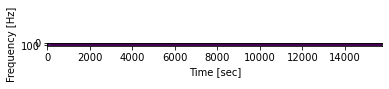

In [35]:
import matplotlib.pyplot as plt
from scipy import signal
from scipy.io import wavfile

sample_rate, samples = wavfile.read(r"D:\MOMDS-cse353\MP3-dataset\mp3s-32k\aerosmith\Aerosmith\01-Make_It.wav")
frequencies, times, spectrogram = signal.spectrogram(samples, sample_rate)

plt.pcolormesh(times, frequencies, spectrogram)
plt.imshow(spectrogram)
plt.ylabel('Frequency [Hz]')
plt.xlabel('Time [sec]')
plt.show()